# Linear Regression Example with the Diabetes Dataset

## Introduction

In this activity, we will perform a linear regression analysis using the Diabetes dataset. The objective is to predict the progression of diabetes (measured by a target variable) based on various features. This exercise will help you understand the process of building and evaluating a linear regression model.

## The Dataset

The Diabetes dataset contains the following features:
- `age`: Age of the patient
- `sex`: Gender of the patient
- `bmi`: Body Mass Index
- `bp`: Average blood pressure
- `s1` to `s6`: Six blood serum measurements

The target variable is:
- `target`: A quantitative measure of disease progression one year after baseline

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of `n_samples` (i.e. the sum of squares of each column totals 1).

## Objective

You will:
1. Load and explore the dataset.
2. Split the data into training and testing sets.
3. Train a linear regression model.
4. Evaluate the model's performance.
5. Visualize the results.

Let's get started!

## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load and explore the dataset

In [3]:
# Load the Diabetes dataset
data = pd.read_csv("data\diabetes.csv")
# Display the first few rows of the dataset
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Splitting the dataset

- Separate the features and target variable.
- Complete the code to split the dataset into training and testing sets using `train_test_split`.
- Specify the test size as 20% and set a random state for reproducibility.

In [4]:
# Separate the features and target variable
X = data.drop('target', axis=1)
y = data['target']

In [5]:
# Use train_test_split to create training and testing sets
# Use a test size of 20% and random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the model

- Create an instance of `LinearRegression` and fit it to the training data.

In [7]:
# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

## Making predictions

- Use the trained model to make predictions on the testing data.

In [8]:
# Use the model to make predictions on the testing data
y_pred = model.predict(X_test)

## Evaluating the model

- Calculate the Mean Squared Error (MSE) and R² score for the model.

In [9]:
# Calculate the Mean Squared Error (MSE) and R² score for the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 2900.1936284934827
R² Score: 0.45260276297191926


## Visualize the results

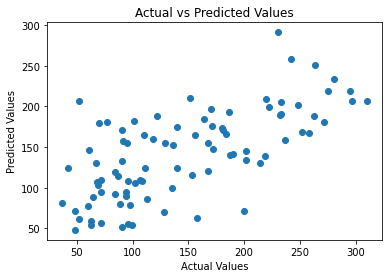

In [10]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Discussion

1. What does the Mean Squared Error (MSE) tell us about the model's performance?
The Mean Squared Error (MSE) measures the average of the squares of the errors, that is, the average squared difference between the predicted values and the actual values. A lower MSE indicates that the model's predictions are closer to the actual values, suggesting better performance. For this model, the MSE is 2900.1931, meaning there is some degree of error in our predictions.

2. What is the significance of the R² score, and what does it indicate about our model?
The R² score, or coefficient of determination, indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with a higher value indicating a better fit. An R² score of 0.4526 means that approximately 45.26% of the variability in the target variable can be explained by the features in the model. This suggests a moderate level of explanatory power.

3. How do the actual values compare to the predicted values in the scatter plot?
In the scatter plot of actual vs. predicted values, we can observe how well the model's predictions align with the actual values. Ideally, the points should lie close to a diagonal line where the actual values equal the predicted values. In this case, the points show some scatter around the diagonal, indicating that while the model captures the general trend, there are deviations and errors in some predictions.

4. Are there any patterns or trends you observe in the scatter plot that could indicate potential issues with the model?
The scatter plot shows some spread around the diagonal line, suggesting that the model does not perfectly predict the target variable. Some potential issues could be:

    - Outliers or noise in the data.
    - The model might not be complex enough to capture all the underlying patterns (underfitting).
    - There could be non-linear relationships that linear regression cannot capture.
